# 연속데이터예측_아이오와에임스지역_집값예측_train

In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("./data/house_train.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

결측값 제거

In [13]:
(data.isna().sum() / len(data) * 100).sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
MasVnrType       59.726027
FireplaceQu      47.260274
LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
Electrical        0.068493
Id                0.000000
Functional        0.000000
Fireplaces        0.000000
KitchenQual       0.000000
KitchenAbvGr      0.000000
BedroomAbvGr      0.000000
HalfBath          0.000000
FullBath          0.000000
BsmtHalfBath      0.000000
TotRmsAbvGrd      0.000000
GarageCars        0.000000
GrLivArea         0.000000
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
S

In [14]:
data = data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'], axis=1)

In [15]:
missing_cols = (data.isna().sum() / len(data) * 100).sort_values(ascending=False).index

LotFrontage      17.739726
GarageYrBlt       5.547945
GarageCond        5.547945
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrArea        0.547945
Electrical        0.068493
WoodDeckSF        0.000000
PavedDrive        0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
SaleCondition     0.000000
BedroomAbvGr      0.000000
SaleType          0.000000
YrSold            0.000000
MoSold            0.000000
MiscVal           0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
PoolArea          0.000000
Functional        0.000000
Fireplaces        0.000000
ScreenPorch       0.000000
2ndFlrSF          0.000000
3SsnPorch         0.000000
GarageCars        0.000000
G

In [17]:
missing_cols = (data.isna().sum() / len(data) * 100).sort_values(ascending=False).index

In [19]:
missing_cols = ['LotFrontage', 'GarageYrBlt', 'GarageCond', 'GarageType',
       'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure',
       'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea', 'Electrical']

In [21]:
data['GarageQual'].dtype

dtype('O')

In [27]:
for col in missing_cols:
#     print(col, data[col].dtype)
    if data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        data[col] = data[col].fillna(data[col].median())

In [28]:
(data.isna().sum() / len(data) * 100).sort_values(ascending=False)

Id               0.0
GarageYrBlt      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
Electrical       0.0
GarageType       0.0
GarageFinish     0.0
HeatingQC        0.0
GarageCars       0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
GarageQual       0.0
GarageArea       0.0
CentralAir       0.0
Heating          0.0
MSSubClass       0.0
YearBuilt        0.0
OverallQual      0.0
HouseStyle       0.0
BldgType         0.0
Condition2       0.0
Condition1       0.0
Neighborhood     0.0
LandSlope        0.0
LotConfig    

이상값 탐지

In [32]:
# !pip install seaborn

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

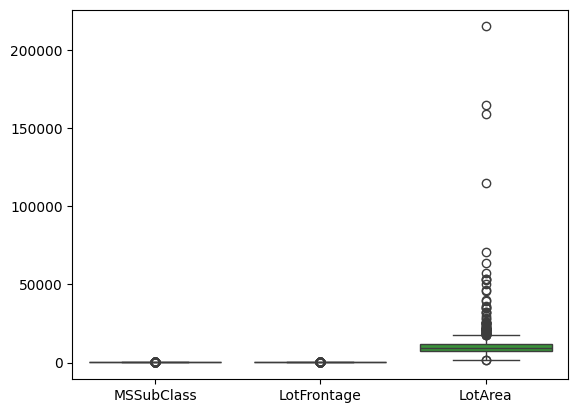

In [37]:
sns.boxplot(data.iloc[:, 1:5])

In [40]:
len(data.columns)

75

<Axes: >

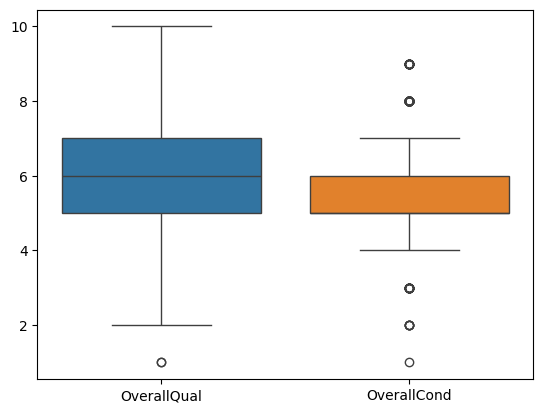

In [42]:
sns.boxplot(data.iloc[:, 16:18])

<Axes: >

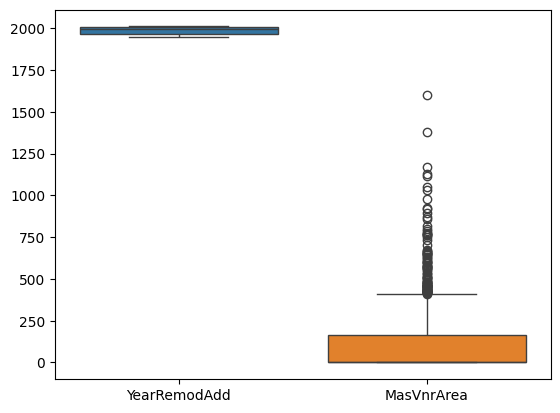

In [43]:
sns.boxplot(data.iloc[:, 19:25])

In [44]:
data2 = data.copy()
data3 = data.copy()

In [46]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclo

In [47]:
X = data.drop(["SalePrice", 'Id'], axis=1)
y = data['SalePrice']

In [48]:
X.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal


In [49]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [50]:
X = pd.get_dummies(X)
X.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,...,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,False,False,False,True,False,False,True,False,False,False,True,False,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,False,False,False,True,False,False,True,False,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False


In [64]:
X = X.astype('float32')

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [67]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
rs = RobustScaler()
rs_X_train = rs.fit_transform(X_train)
rs_X_valid = rs.transform(X_valid)


In [69]:
import joblib
joblib.dump(rs, "./model/iowa_rs.joblib")

['./model/iowa_rs.joblib']

# 출력층 Dense(1) 
# model.compile(loss='mean_squared_error', metrics='mse')

In [70]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError

In [71]:
inputs = Input(shape=(rs_X_train.shape[1], ))
x = Dense(32, activation='relu')(inputs)
x = Dense(16, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(1)(x)
base_model = Model(inputs=inputs, outputs=outputs)
base_model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 266)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         8,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,089 (35.50 KB)

 Trainable params: 9,089 (35.50 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
base_model.compile(loss='mean_squared_error', optimizer='adam', metrics=[RootMeanSquaredError()])
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_path = "./model/iowa_base_model_best.keras"
check_point = ModelCheckpoint(filepath=model_path, monitor='val_loss', save_best_only=True, verbose=1)
base_model_history = base_model.fit(rs_X_train, y_train, epochs=1000, batch_size=32,
                                   validation_data=(rs_X_valid, y_valid),
                                   callbacks=[early_stop, check_point],
                                   verbose=1)

Epoch 1/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 37196206080.0000 - root_mean_squared_error: 192752.2500
Epoch 1: val_loss improved from inf to 39377506304.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 37247606784.0000 - root_mean_squared_error: 192887.3750 - val_loss: 39377506304.0000 - val_root_mean_squared_error: 198437.6562
Epoch 2/1000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 37015719936.0000 - root_mean_squared_error: 192301.0625
Epoch 2: val_loss improved from 39377506304.00000 to 39369248768.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 37378760704.0000 - root_mean_squared_error: 193253.6719 - val_loss: 39369248768.0000 - val_root_mean_squared_error: 198416.8594
Epoch 3/1000
24/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38963105792.0000 - root_mean_squared_error: 197358.7031
Epoch 3: val_loss improved from 39369248768.00000 to 39351562240.00

Epoch 18/1000
25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33044092928.0000 - root_mean_squared_error: 181669.0781
Epoch 18: val_loss improved from 34396794880.00000 to 34000912384.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 32813266944.0000 - root_mean_squared_error: 181056.4062 - val_loss: 34000912384.0000 - val_root_mean_squared_error: 184393.3594
Epoch 19/1000
24/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32910641152.0000 - root_mean_squared_error: 181395.7656
Epoch 19: val_loss improved from 34000912384.00000 to 33497729024.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 32590477312.0000 - root_mean_squared_error: 180509.8594 - val_loss: 33497729024.0000 - val_root_mean_squared_error: 183023.8438
Epoch 20/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30974171136.0000 - root_mean_squared_error: 175967.1562
Epoch 20: val_loss improved from 33497729024.00000 

Epoch 35/1000
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24733865984.0000 - root_mean_squared_error: 157137.5312
Epoch 35: val_loss improved from 26451281920.00000 to 25925785600.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 24844716032.0000 - root_mean_squared_error: 157502.7812 - val_loss: 25925785600.0000 - val_root_mean_squared_error: 161014.8594
Epoch 36/1000
25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24323817472.0000 - root_mean_squared_error: 155925.0312
Epoch 36: val_loss improved from 25925785600.00000 to 25578711040.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 24430370816.0000 - root_mean_squared_error: 156273.7031 - val_loss: 25578711040.0000 - val_root_mean_squared_error: 159933.4531
Epoch 37/1000
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25123043328.0000 - root_mean_squared_error: 158467.1719
Epoch 37: val_loss improved from 25578711040.00000

Epoch 52/1000
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17425596416.0000 - root_mean_squared_error: 131941.6094
Epoch 52: val_loss improved from 18938710016.00000 to 18487083008.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17611630592.0000 - root_mean_squared_error: 132639.1719 - val_loss: 18487083008.0000 - val_root_mean_squared_error: 135967.2188
Epoch 53/1000
25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18493005824.0000 - root_mean_squared_error: 135893.6094
Epoch 53: val_loss improved from 18487083008.00000 to 18011056128.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 18379163648.0000 - root_mean_squared_error: 135494.7656 - val_loss: 18011056128.0000 - val_root_mean_squared_error: 134205.2656
Epoch 54/1000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18036336640.0000 - root_mean_squared_error: 134269.6875
Epoch 54: val_loss improved from 18011056128.00000 

Epoch 69/1000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10835560448.0000 - root_mean_squared_error: 104049.6797
Epoch 69: val_loss improved from 10676253696.00000 to 10120322048.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10790709248.0000 - root_mean_squared_error: 103839.4141 - val_loss: 10120322048.0000 - val_root_mean_squared_error: 100599.8125
Epoch 70/1000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10349390848.0000 - root_mean_squared_error: 101632.1172
Epoch 70: val_loss improved from 10120322048.00000 to 9664417792.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10348026880.0000 - root_mean_squared_error: 101640.5234 - val_loss: 9664417792.0000 - val_root_mean_squared_error: 98307.7656
Epoch 71/1000
24/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9433334784.0000 - root_mean_squared_error: 97097.5938
Epoch 71: val_loss improved from 9664417792.00000 to 92

30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5165777408.0000 - root_mean_squared_error: 71820.0469
Epoch 86: val_loss improved from 4402600448.00000 to 4162819072.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5194605056.0000 - root_mean_squared_error: 72022.4375 - val_loss: 4162819072.0000 - val_root_mean_squared_error: 64519.9102
Epoch 87/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5124617728.0000 - root_mean_squared_error: 71571.1484
Epoch 87: val_loss improved from 4162819072.00000 to 3926777344.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5146598400.0000 - root_mean_squared_error: 71722.9766 - val_loss: 3926777344.0000 - val_root_mean_squared_error: 62664.0039
Epoch 88/1000
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4840491008.0000 - root_mean_squared_error: 69544.1719
Epoch 88: val_loss improved from 3926777344.00000 to 3780796416.00000, saving model

24/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3744808960.0000 - root_mean_squared_error: 60786.1172
Epoch 103: val_loss improved from 2504932096.00000 to 2389691648.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3863906304.0000 - root_mean_squared_error: 61843.0508 - val_loss: 2389691648.0000 - val_root_mean_squared_error: 48884.4727
Epoch 104/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3619753984.0000 - root_mean_squared_error: 60127.5039
Epoch 104: val_loss improved from 2389691648.00000 to 2378749696.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3618848768.0000 - root_mean_squared_error: 60121.0820 - val_loss: 2378749696.0000 - val_root_mean_squared_error: 48772.4297
Epoch 105/1000
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6187611136.0000 - root_mean_squared_error: 76563.2500
Epoch 105: val_loss improved from 2378749696.00000 to 2378485504.00000, saving

Epoch 121/1000
24/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3213473792.0000 - root_mean_squared_error: 56618.9922
Epoch 121: val_loss improved from 2023200768.00000 to 1977035392.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3286067712.0000 - root_mean_squared_error: 57254.7578 - val_loss: 1977035392.0000 - val_root_mean_squared_error: 44463.8672
Epoch 122/1000
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4307044352.0000 - root_mean_squared_error: 65358.3281
Epoch 122: val_loss did not improve from 1977035392.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4241404160.0000 - root_mean_squared_error: 64874.1016 - val_loss: 2025971328.0000 - val_root_mean_squared_error: 45010.7891
Epoch 123/1000
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4455237120.0000 - root_mean_squared_error: 66373.5625
Epoch 123: val_loss did not improve from 1977035392.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4333126144.0000 - root_m

Epoch 140/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4069719296.0000 - root_mean_squared_error: 63242.9844
Epoch 140: val_loss did not improve from 1870406272.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4024595712.0000 - root_mean_squared_error: 62904.8867 - val_loss: 1910025344.0000 - val_root_mean_squared_error: 43703.8359
Epoch 141/1000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3164751616.0000 - root_mean_squared_error: 56107.8203
Epoch 141: val_loss improved from 1870406272.00000 to 1860079232.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3210371840.0000 - root_mean_squared_error: 56537.9062 - val_loss: 1860079232.0000 - val_root_mean_squared_error: 43128.6367
Epoch 142/1000
21/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2706610176.0000 - root_mean_squared_error: 51697.2070
Epoch 142: val_loss improved from 1860079232.00000 to 1860072960.00000, saving model to ./model/iowa_base_model_best.keras
32/32

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3433285376.0000 - root_mean_squared_error: 58563.1445 - val_loss: 1750159488.0000 - val_root_mean_squared_error: 41834.9062
Epoch 159/1000
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4139338240.0000 - root_mean_squared_error: 64021.1289
Epoch 159: val_loss did not improve from 1750159488.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3986300672.0000 - root_mean_squared_error: 62821.7109 - val_loss: 1782184832.0000 - val_root_mean_squared_error: 42215.9297
Epoch 160/1000
24/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3400906752.0000 - root_mean_squared_error: 58275.9219
Epoch 160: val_loss did not improve from 1750159488.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3399712512.0000 - root_mean_squared_error: 58272.5625 - val_loss: 1786965632.0000 - val_root_mean_squared_error: 42272.5156
Epoch 161/1000
24/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3673082112.0000 - root_mean_squared_error: 60514.5156
Epoch 161: val_loss di

Epoch 178/1000
23/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2897710080.0000 - root_mean_squared_error: 53715.8789
Epoch 178: val_loss did not improve from 1691654912.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2970683648.0000 - root_mean_squared_error: 54414.7109 - val_loss: 1728417792.0000 - val_root_mean_squared_error: 41574.2422
Epoch 179/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3502164992.0000 - root_mean_squared_error: 59134.3164
Epoch 179: val_loss improved from 1691654912.00000 to 1676809088.00000, saving model to ./model/iowa_base_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3509399808.0000 - root_mean_squared_error: 59197.6445 - val_loss: 1676809088.0000 - val_root_mean_squared_error: 40948.8594
Epoch 180/1000
22/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3023956736.0000 - root_mean_squared_error: 54841.9609
Epoch 180: val_loss did not improve from 1676809088.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3173370368.0000 - root_m

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3329054720.0000 - root_mean_squared_error: 57534.4180
Epoch 197: val_loss did not improve from 1617339008.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3321104640.0000 - root_mean_squared_error: 57469.0664 - val_loss: 1649519232.0000 - val_root_mean_squared_error: 40614.2734
Epoch 198/1000
23/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2823720704.0000 - root_mean_squared_error: 53083.6641
Epoch 198: val_loss did not improve from 1617339008.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2924813824.0000 - root_mean_squared_error: 54023.6641 - val_loss: 1641526272.0000 - val_root_mean_squared_error: 40515.7539
Epoch 199/1000
23/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3604699904.0000 - root_mean_squared_error: 59971.2305
Epoch 199: val_loss did not improve from 1617339008.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3521118464.0000 - root_mean_squared_error: 59281.4922 - val_loss: 1627867392.0000 - val_root_mean_square

In [73]:
pred = base_model.predict(rs_X_valid)
pred = pd.DataFrame(pred, columns=['pred'])
pred

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


,pred
0,129778.281250
1,283152.187500
2,88107.546875
3,130499.781250
4,280258.812500
...,...
433,91385.656250
434,116905.953125
435,172686.609375
436,145640.078125


In [75]:
y_valid = pd.DataFrame(y_valid)
y_valid_df = y_valid.reset_index(drop=True)
final_result = y_valid_df.join(pred)
final_result

,SalePrice,pred
0,154500,129778.281250
1,325000,283152.187500
2,115000,88107.546875
3,159000,130499.781250
4,315500,280258.812500
...,...,...
433,139000,91385.656250
434,126175,116905.953125
435,205950,172686.609375
436,110000,145640.078125


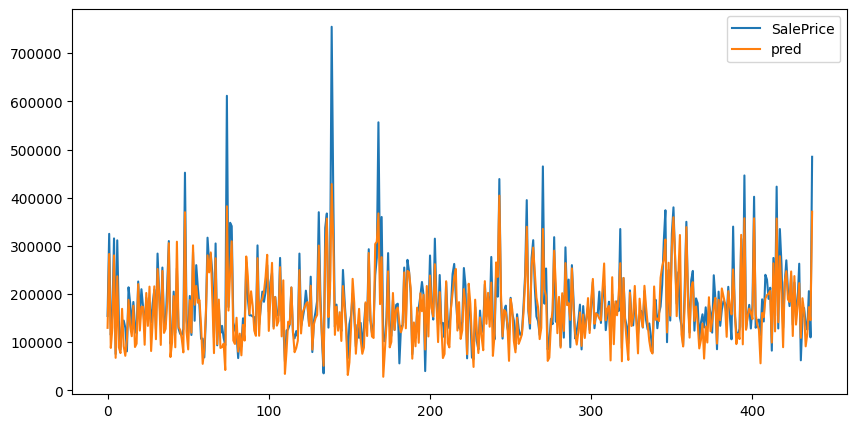

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1649291520.0000 - root_mean_squared_error: 40470.3516
[1589242752.0, 39865.30859375]


In [76]:
plt.figure(figsize=(10,5))
plt.plot(final_result['SalePrice'], label='SalePrice')
plt.plot(final_result['pred'], label='pred')
plt.legend()
plt.show()
print(base_model.evaluate(rs_X_valid, y_valid))

# 많은 컬럼 중에 어떤 컬럼을 선택? 266개
* 컬럼의 상관분석을 통해 타겟 변수(종속변수)와 상관도가 높은 컬럼만 선택
* 트리계열 알고리즘을 사용해 분석 후 중요한 변수만 추출해서 재분석

In [77]:
data2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [78]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [79]:
data2.drop('Id', axis=1, inplace=True)

In [80]:
data2 = pd.get_dummies(data2)
data2.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,...,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,False,False,False,True,False,False,True,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,False,False,False,True,False,False,True,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False


상관분석

In [ ]:
# data2['SalePrice']

In [85]:
corr_rate = data2.corr(method='spearman')['SalePrice'].sort_values(ascending=False)

In [90]:
new_cols1 = corr_rate.head(15).index
new_cols1

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt',
       'GarageArea', 'FullBath', 'TotalBsmtSF', '1stFlrSF', 'ExterQual_Gd',
       'YearRemodAdd', 'GarageYrBlt', 'Foundation_PConc', 'TotRmsAbvGrd',
       'Fireplaces'],
      dtype='object')

In [95]:
new_cols2 = corr_rate.tail(4).index
new_cols2

Index(['KitchenQual_TA', 'BsmtQual_TA', 'GarageFinish_Unf', 'ExterQual_TA'], dtype='object')

In [96]:
final_cols = list(new_cols1) + list(new_cols2)
final_cols

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'YearBuilt',
 'GarageArea',
 'FullBath',
 'TotalBsmtSF',
 '1stFlrSF',
 'ExterQual_Gd',
 'YearRemodAdd',
 'GarageYrBlt',
 'Foundation_PConc',
 'TotRmsAbvGrd',
 'Fireplaces',
 'KitchenQual_TA',
 'BsmtQual_TA',
 'GarageFinish_Unf',
 'ExterQual_TA']

In [97]:
final_cols

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'YearBuilt',
 'GarageArea',
 'FullBath',
 'TotalBsmtSF',
 '1stFlrSF',
 'ExterQual_Gd',
 'YearRemodAdd',
 'GarageYrBlt',
 'Foundation_PConc',
 'TotRmsAbvGrd',
 'Fireplaces',
 'KitchenQual_TA',
 'BsmtQual_TA',
 'GarageFinish_Unf',
 'ExterQual_TA']

In [100]:
data2

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,...,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,False,False,False,True,False,False,True,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,False,False,False,True,False,False,True,False,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,False,False,False,True,False,False,True,True,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,False,False,False,True,False,False,True,True,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,False,False,False,True,False,False,True,True,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [101]:
final_df = data2[final_cols]

In [102]:
final_df

,SalePrice,OverallQual,GrLivArea,GarageCars,YearBuilt,GarageArea,FullBath,TotalBsmtSF,1stFlrSF,ExterQual_Gd,YearRemodAdd,GarageYrBlt,Foundation_PConc,TotRmsAbvGrd,Fireplaces,KitchenQual_TA,BsmtQual_TA,GarageFinish_Unf,ExterQual_TA
0,208500,7,1710,2,2003,548,2,856,856,True,2003,2003.0,True,8,0,False,False,False,False
1,181500,6,1262,2,1976,460,2,1262,1262,False,1976,1976.0,False,6,1,True,False,False,True
2,223500,7,1786,2,2001,608,2,920,920,True,2002,2001.0,True,6,1,False,False,False,False
3,140000,7,1717,3,1915,642,1,756,961,False,1970,1998.0,False,7,1,False,True,True,True
4,250000,8,2198,3,2000,836,2,1145,1145,True,2000,2000.0,True,9,1,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,1999,460,2,953,953,False,2000,1999.0,True,7,1,True,False,False,True
1456,210000,6,2073,2,1978,500,2,1542,2073,False,1988,1978.0,False,7,2,True,False,True,True
1457,266500,7,2340,1,1941,252,2,1152,1188,False,2006,1941.0,False,9,2,False,True,False,False
1458,142125,5,1078,1,1950,240,1,1078,1078,False,1996,1950.0,False,5,0,False,True,True,True


In [105]:
final_df.corr(method='spearman')

,SalePrice,OverallQual,GrLivArea,GarageCars,YearBuilt,GarageArea,FullBath,TotalBsmtSF,1stFlrSF,ExterQual_Gd,YearRemodAdd,GarageYrBlt,Foundation_PConc,TotRmsAbvGrd,Fireplaces,KitchenQual_TA,BsmtQual_TA,GarageFinish_Unf,ExterQual_TA
SalePrice,1.000000,0.809829,0.731310,0.690711,0.652682,0.649379,0.635957,0.602725,0.575408,0.574642,0.571159,0.563256,0.562287,0.532586,0.519247,-0.581803,-0.583512,-0.620915,-0.637785
OverallQual,0.809829,1.000000,0.603262,0.608756,0.647392,0.541552,0.576372,0.459915,0.408730,0.603276,0.557723,0.592010,0.586764,0.427806,0.420626,-0.581192,-0.590344,-0.556712,-0.673842
GrLivArea,0.731310,0.603262,1.000000,0.505094,0.288493,0.468211,0.658419,0.371026,0.494421,0.358133,0.282400,0.274625,0.332373,0.827874,0.480804,-0.376159,-0.338674,-0.362334,-0.413922
GarageCars,0.690711,0.608756,0.505094,1.000000,0.601519,0.853317,0.518310,0.455508,0.450580,0.443029,0.456245,0.564786,0.480178,0.386244,0.325520,-0.423255,-0.504415,-0.489950,-0.506121
YearBuilt,0.652682,0.647392,0.288493,0.601519,1.000000,0.528281,0.537420,0.427187,0.293363,0.593575,0.684388,0.845595,0.704001,0.176820,0.174655,-0.512248,-0.700552,-0.632360,-0.644772
GarageArea,0.649379,0.541552,0.468211,0.853317,0.528281,1.000000,0.444459,0.486685,0.489797,0.389859,0.398267,0.540450,0.400205,0.330549,0.264543,-0.393538,-0.413167,-0.449457,-0.453014
FullBath,0.635957,0.576372,0.658419,0.518310,0.537420,0.444459,1.000000,0.328036,0.366891,0.449973,0.431390,0.524892,0.480765,0.558665,0.268548,-0.430333,-0.513693,-0.450629,-0.485598
TotalBsmtSF,0.602725,0.459915,0.371026,0.455508,0.427187,0.486685,0.328036,1.000000,0.829292,0.313044,0.299042,0.319936,0.296406,0.233913,0.325687,-0.307764,-0.317195,-0.385379,-0.383999
1stFlrSF,0.575408,0.408730,0.494421,0.450580,0.293363,0.489797,0.366891,0.829292,1.000000,0.225259,0.240265,0.214327,0.179926,0.361777,0.394883,-0.268281,-0.215559,-0.326525,-0.294636
ExterQual_Gd,0.574642,0.603276,0.358133,0.443029,0.593575,0.389859,0.449973,0.313044,0.225259,1.000000,0.532550,0.569570,0.586748,0.212665,0.181413,-0.617598,-0.541969,-0.483784,-0.906121


<Axes: >

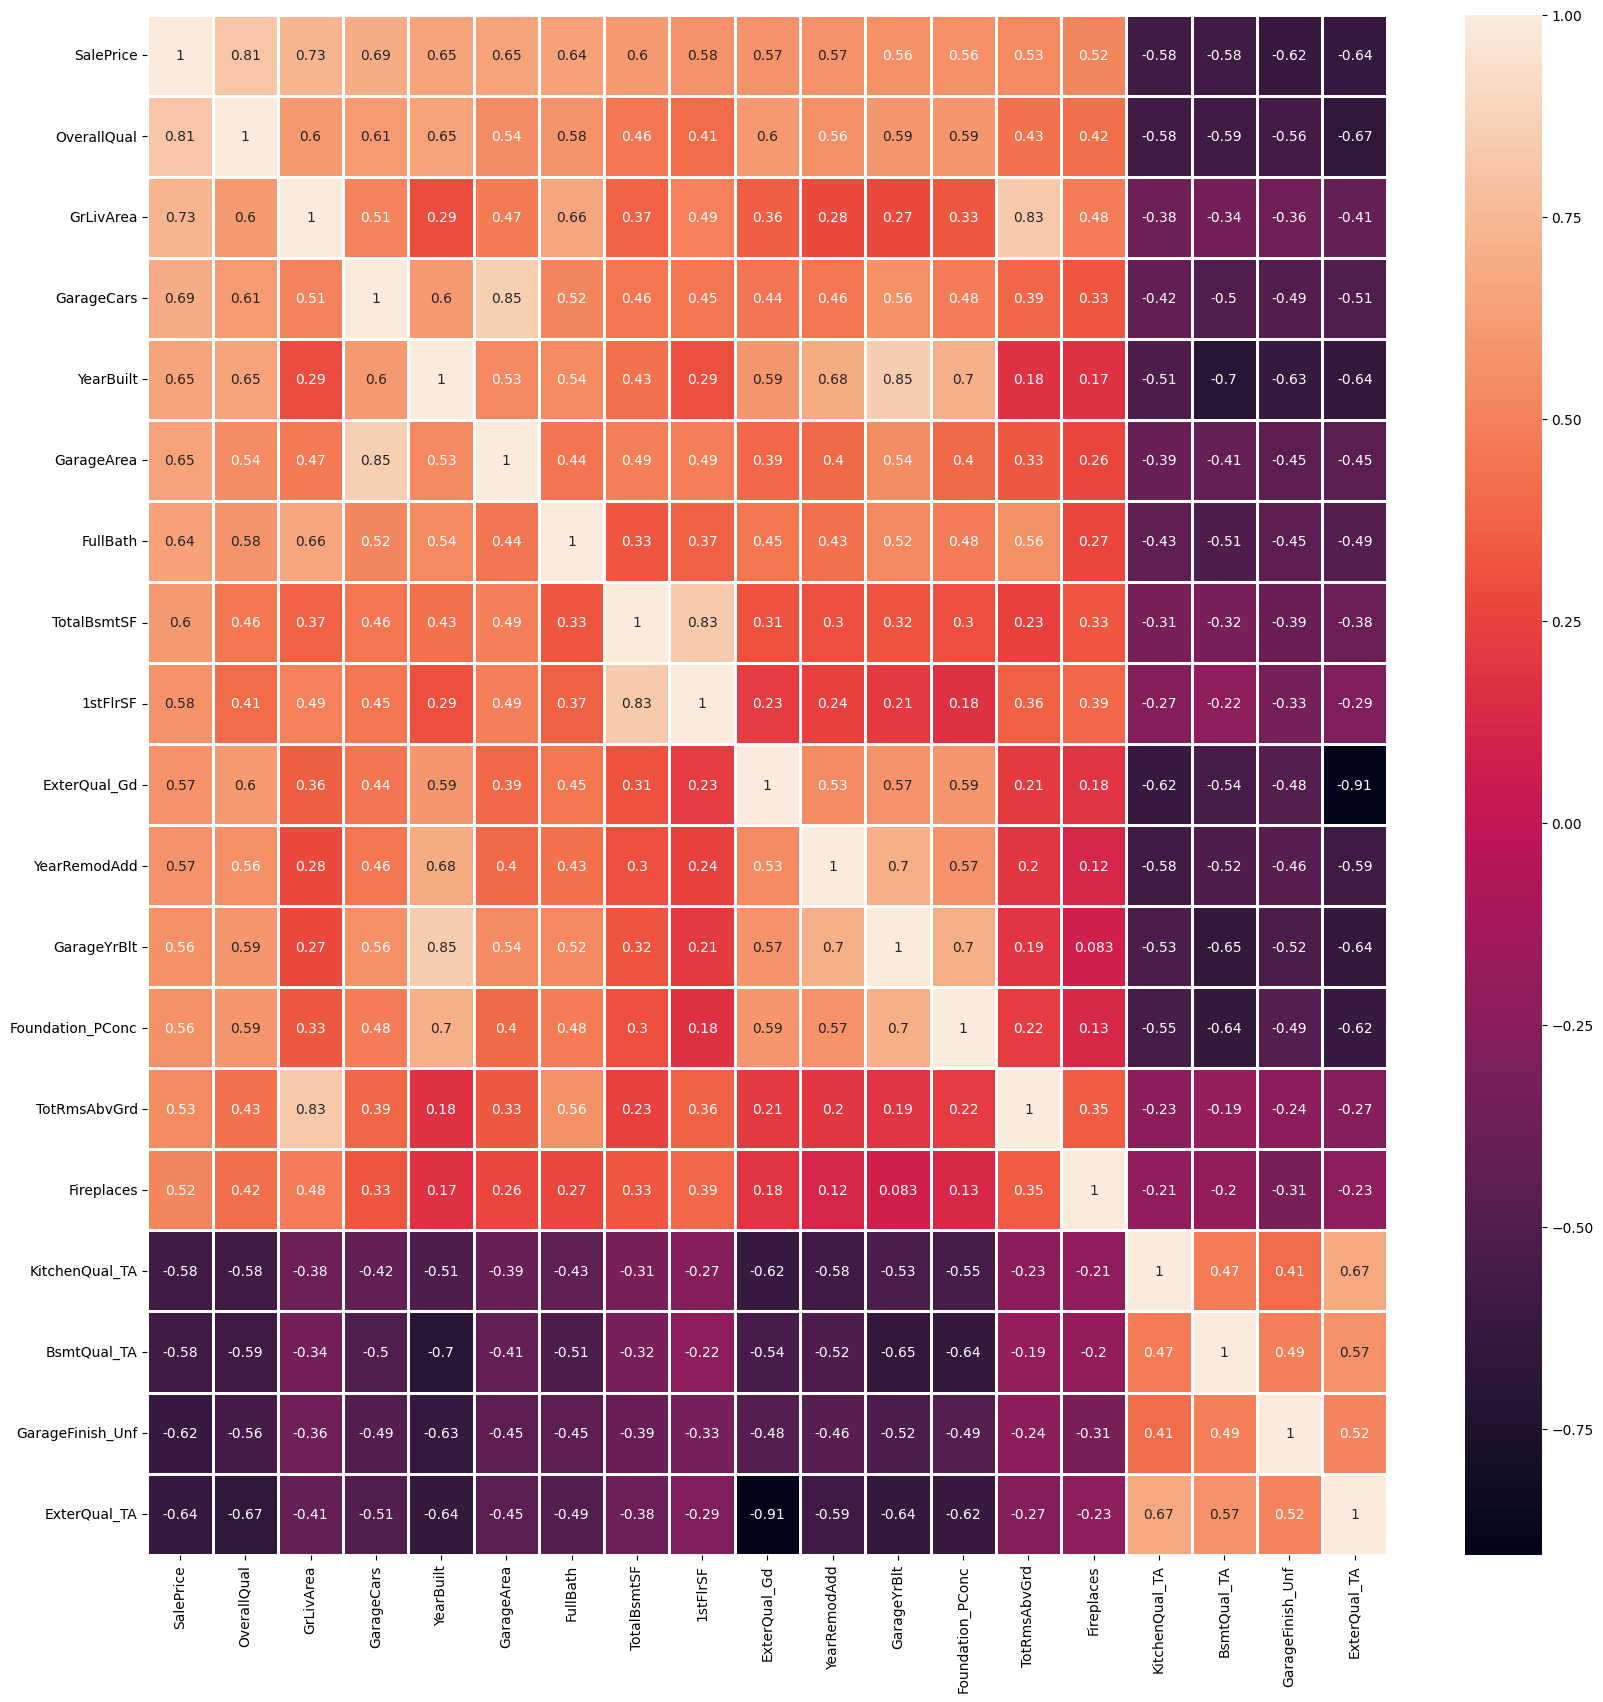

In [104]:
plt.figure(figsize=(20,20))
sns.heatmap(final_df.corr(method='spearman'), annot=True, linewidths=1)

In [ ]:
ExterQual_TA - ExterQual_Gd -0.91
BsmtQual_TA - YearBuilt -0.7
BsmtQual_TA - YearBuilt 0.7
TotRmsAbvGrd - GrLivArea 0.83

In [106]:
final_df = final_df.drop(['BsmtQual_TA', 'TotRmsAbvGrd','ExterQual_Gd'], axis=1)

In [107]:
X2 = final_df.drop('SalePrice', axis=1)
y2 = final_df['SalePrice']

In [108]:
X2

,OverallQual,GrLivArea,GarageCars,YearBuilt,GarageArea,FullBath,TotalBsmtSF,1stFlrSF,YearRemodAdd,GarageYrBlt,Foundation_PConc,Fireplaces,KitchenQual_TA,GarageFinish_Unf,ExterQual_TA
0,7,1710,2,2003,548,2,856,856,2003,2003.0,True,0,False,False,False
1,6,1262,2,1976,460,2,1262,1262,1976,1976.0,False,1,True,False,True
2,7,1786,2,2001,608,2,920,920,2002,2001.0,True,1,False,False,False
3,7,1717,3,1915,642,1,756,961,1970,1998.0,False,1,False,True,True
4,8,2198,3,2000,836,2,1145,1145,2000,2000.0,True,1,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,1999,460,2,953,953,2000,1999.0,True,1,True,False,True
1456,6,2073,2,1978,500,2,1542,2073,1988,1978.0,False,2,True,True,True
1457,7,2340,1,1941,252,2,1152,1188,2006,1941.0,False,2,False,False,False
1458,5,1078,1,1950,240,1,1078,1078,1996,1950.0,False,0,False,True,True


In [109]:
X2_train, X2_valid, y2_train, y2_valid = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [115]:
rs2 = RobustScaler()
rs2_X2_tarin = rs2.fit_transform(X2_train)
rs2_X2_valid = rs2.transform(X2_valid)

In [116]:
rs2_X2_tarin = rs2_X2_tarin.astype('float32')
rs2_X2_valid = rs2_X2_valid.astype('float32')

In [117]:
inputs = Input(shape=(rs2_X2_tarin.shape[1], ))
x = Dense(32, activation='relu')(inputs)
x = Dense(16, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(1)(x)
corr_select_model = Model(inputs=inputs, outputs=outputs)
corr_select_model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [118]:
corr_select_model.compile(loss='mean_squared_error', optimizer='adam', metrics=[RootMeanSquaredError()])
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_path = "./model/iowa_corr_select_model_best.keras"
check_point = ModelCheckpoint(filepath=model_path, monitor='val_loss', save_best_only=True, verbose=1)
corr_select_model_history = corr_select_model.fit(rs2_X2_tarin, y2_train, epochs=1000, batch_size=32,
                                   validation_data=(rs2_X2_valid, y2_valid),
                                   callbacks=[early_stop, check_point],
                                   verbose=1)

Epoch 1/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 38725398528.0000 - root_mean_squared_error: 196674.0781
Epoch 1: val_loss improved from inf to 39380426752.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 38730465280.0000 - root_mean_squared_error: 196690.3906 - val_loss: 39380426752.0000 - val_root_mean_squared_error: 198445.0156
Epoch 2/1000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39595671552.0000 - root_mean_squared_error: 198969.3125
Epoch 2: val_loss improved from 39380426752.00000 to 39379656704.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 39515643904.0000 - root_mean_squared_error: 198770.1094 - val_loss: 39379656704.0000 - val_root_mean_squared_error: 198443.0781
Epoch 3/1000
22/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39520382976.0000 - root_mean_squared_error: 198780.7031
Epoch 3: val_loss improved from 39379656704.00000 to 

Epoch 18/1000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38042873856.0000 - root_mean_squared_error: 195021.6875
Epoch 18: val_loss improved from 38972674048.00000 to 38896558080.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 38142271488.0000 - root_mean_squared_error: 195280.7812 - val_loss: 38896558080.0000 - val_root_mean_squared_error: 197222.0938
Epoch 19/1000
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38736793600.0000 - root_mean_squared_error: 196776.2500
Epoch 19: val_loss improved from 38896558080.00000 to 38811209728.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 38700032000.0000 - root_mean_squared_error: 196686.2812 - val_loss: 38811209728.0000 - val_root_mean_squared_error: 197005.6094
Epoch 20/1000
25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 36151156736.0000 - root_mean_squared_error: 190007.4531
Epoch 20: val_loss improved from 388

Epoch 35/1000
23/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35134377984.0000 - root_mean_squared_error: 187406.0625
Epoch 35: val_loss improved from 36327309312.00000 to 36067680256.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 35151323136.0000 - root_mean_squared_error: 187461.0312 - val_loss: 36067680256.0000 - val_root_mean_squared_error: 189914.9219
Epoch 36/1000
25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34665480192.0000 - root_mean_squared_error: 186147.3906
Epoch 36: val_loss improved from 36067680256.00000 to 35803287552.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 34919665664.0000 - root_mean_squared_error: 186834.2812 - val_loss: 35803287552.0000 - val_root_mean_squared_error: 189217.5625
Epoch 37/1000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34430812160.0000 - root_mean_squared_error: 185532.0312
Epoch 37: val_loss improved from 3580

Epoch 52/1000
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32739387392.0000 - root_mean_squared_error: 180706.6250
Epoch 52: val_loss improved from 30627309568.00000 to 30199306240.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 32191307776.0000 - root_mean_squared_error: 179197.8438 - val_loss: 30199306240.0000 - val_root_mean_squared_error: 173779.4688
Epoch 53/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31167203328.0000 - root_mean_squared_error: 176421.9062
Epoch 53: val_loss improved from 30199306240.00000 to 29782425600.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 31084324864.0000 - root_mean_squared_error: 176191.8438 - val_loss: 29782425600.0000 - val_root_mean_squared_error: 172575.8594
Epoch 54/1000
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28994510848.0000 - root_mean_squared_error: 170267.9844
Epoch 54: val_loss improved from 2978

Epoch 69/1000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21886842880.0000 - root_mean_squared_error: 147928.2656
Epoch 69: val_loss improved from 22915010560.00000 to 22439512064.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21924104192.0000 - root_mean_squared_error: 148055.8750 - val_loss: 22439512064.0000 - val_root_mean_squared_error: 149798.2344
Epoch 70/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22617702400.0000 - root_mean_squared_error: 150356.9688
Epoch 70: val_loss improved from 22439512064.00000 to 21960968192.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22577766400.0000 - root_mean_squared_error: 150225.3281 - val_loss: 21960968192.0000 - val_root_mean_squared_error: 148192.3281
Epoch 71/1000
30/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21698048000.0000 - root_mean_squared_error: 147242.6875
Epoch 71: val_loss improved from 2196

Epoch 86/1000
23/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17237940224.0000 - root_mean_squared_error: 131229.6562
Epoch 86: val_loss improved from 15244723200.00000 to 14840957952.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16936806400.0000 - root_mean_squared_error: 130083.7500 - val_loss: 14840957952.0000 - val_root_mean_squared_error: 121823.4688
Epoch 87/1000
25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15363313664.0000 - root_mean_squared_error: 123915.0469
Epoch 87: val_loss improved from 14840957952.00000 to 14447584256.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15264126976.0000 - root_mean_squared_error: 123520.3594 - val_loss: 14447584256.0000 - val_root_mean_squared_error: 120198.1016
Epoch 88/1000
21/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15712052224.0000 - root_mean_squared_error: 125332.2109
Epoch 88: val_loss improved from 1444

Epoch 103/1000
23/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9851440128.0000 - root_mean_squared_error: 99240.6172 
Epoch 103: val_loss improved from 9436896256.00000 to 9170144256.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9946888192.0000 - root_mean_squared_error: 99721.5078 - val_loss: 9170144256.0000 - val_root_mean_squared_error: 95760.8672
Epoch 104/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10028193792.0000 - root_mean_squared_error: 100073.8125
Epoch 104: val_loss improved from 9170144256.00000 to 8918963200.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10057790464.0000 - root_mean_squared_error: 100223.8984 - val_loss: 8918963200.0000 - val_root_mean_squared_error: 94440.2578
Epoch 105/1000
22/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9591696384.0000 - root_mean_squared_error: 97923.8203
Epoch 105: val_loss improved from 891896320

Epoch 120/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7346639872.0000 - root_mean_squared_error: 85607.5625
Epoch 120: val_loss improved from 6033861632.00000 to 5895737856.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7361337856.0000 - root_mean_squared_error: 85695.1172 - val_loss: 5895737856.0000 - val_root_mean_squared_error: 76783.7109
Epoch 121/1000
25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7863394304.0000 - root_mean_squared_error: 88574.5547
Epoch 121: val_loss improved from 5895737856.00000 to 5766332416.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8029795840.0000 - root_mean_squared_error: 89516.7500 - val_loss: 5766332416.0000 - val_root_mean_squared_error: 75936.3672
Epoch 122/1000
25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7750919680.0000 - root_mean_squared_error: 87872.5781
Epoch 122: val_loss improved from 5766332416.0000

Epoch 137/1000
16/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7246001152.0000 - root_mean_squared_error: 85044.8438 
Epoch 137: val_loss improved from 4433314304.00000 to 4365259776.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6986493440.0000 - root_mean_squared_error: 83528.9844 - val_loss: 4365259776.0000 - val_root_mean_squared_error: 66070.1094
Epoch 138/1000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6873255424.0000 - root_mean_squared_error: 82843.1562
Epoch 138: val_loss improved from 4365259776.00000 to 4298024960.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6876691968.0000 - root_mean_squared_error: 82873.2188 - val_loss: 4298024960.0000 - val_root_mean_squared_error: 65559.3203
Epoch 139/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5960353280.0000 - root_mean_squared_error: 77158.2578
Epoch 139: val_loss improved from 4298024960.0000

Epoch 154/1000
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6228551680.0000 - root_mean_squared_error: 78792.4922
Epoch 154: val_loss improved from 3738086912.00000 to 3718921472.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6433065984.0000 - root_mean_squared_error: 80057.4453 - val_loss: 3718921472.0000 - val_root_mean_squared_error: 60982.9609
Epoch 155/1000
17/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6761260544.0000 - root_mean_squared_error: 82202.4766 
Epoch 155: val_loss improved from 3718921472.00000 to 3697936384.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6733562368.0000 - root_mean_squared_error: 82043.4219 - val_loss: 3697936384.0000 - val_root_mean_squared_error: 60810.6602
Epoch 156/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6311749120.0000 - root_mean_squared_error: 79423.0312
Epoch 156: val_loss improved from 3697936384.0000

Epoch 171/1000
16/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6463640064.0000 - root_mean_squared_error: 80124.0156 
Epoch 171: val_loss improved from 3434277376.00000 to 3424178176.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6213926400.0000 - root_mean_squared_error: 78680.1719 - val_loss: 3424178176.0000 - val_root_mean_squared_error: 58516.4766
Epoch 172/1000
15/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5451812352.0000 - root_mean_squared_error: 73776.2578 
Epoch 172: val_loss improved from 3424178176.00000 to 3404943616.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5800717824.0000 - root_mean_squared_error: 76090.6406 - val_loss: 3404943616.0000 - val_root_mean_squared_error: 58351.8945
Epoch 173/1000
23/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5606461440.0000 - root_mean_squared_error: 74844.2344
Epoch 173: val_loss improved from 3404943616.000

Epoch 189/1000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6689004544.0000 - root_mean_squared_error: 81405.1719
Epoch 189: val_loss improved from 3258151936.00000 to 3256477440.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6561696256.0000 - root_mean_squared_error: 80658.0391 - val_loss: 3256477440.0000 - val_root_mean_squared_error: 57065.5547
Epoch 190/1000
25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7203913728.0000 - root_mean_squared_error: 84576.2109
Epoch 190: val_loss improved from 3256477440.00000 to 3243746816.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7036221440.0000 - root_mean_squared_error: 83635.8125 - val_loss: 3243746816.0000 - val_root_mean_squared_error: 56953.8984
Epoch 191/1000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5501056512.0000 - root_mean_squared_error: 74157.7031
Epoch 191: val_loss improved from 3243746816.00000

26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8212395008.0000 - root_mean_squared_error: 89871.6641
Epoch 206: val_loss did not improve from 3124756992.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7862630400.0000 - root_mean_squared_error: 87993.0312 - val_loss: 3133670400.0000 - val_root_mean_squared_error: 55979.1953
Epoch 207/1000
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5749134336.0000 - root_mean_squared_error: 75802.8672
Epoch 207: val_loss did not improve from 3124756992.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5784802304.0000 - root_mean_squared_error: 76039.6641 - val_loss: 3127095552.0000 - val_root_mean_squared_error: 55920.4375
Epoch 208/1000
24/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5416162816.0000 - root_mean_squared_error: 73529.8828
Epoch 208: val_loss improved from 3124756992.00000 to 3110418688.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5433242624.0000 - root_mean_squa

22/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5373113344.0000 - root_mean_squared_error: 73285.0391
Epoch 224: val_loss improved from 3037469184.00000 to 3029435392.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5368358400.0000 - root_mean_squared_error: 73257.8281 - val_loss: 3029435392.0000 - val_root_mean_squared_error: 55040.3047
Epoch 225/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5679325184.0000 - root_mean_squared_error: 75113.0234
Epoch 225: val_loss did not improve from 3029435392.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5722048512.0000 - root_mean_squared_error: 75403.2344 - val_loss: 3030603520.0000 - val_root_mean_squared_error: 55050.9180
Epoch 226/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5592890368.0000 - root_mean_squared_error: 74735.0781
Epoch 226: val_loss improved from 3029435392.00000 to 3017977088.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━

Epoch 242/1000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5521903616.0000 - root_mean_squared_error: 74164.5625
Epoch 242: val_loss did not improve from 2922515456.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5675052544.0000 - root_mean_squared_error: 75194.1016 - val_loss: 2926586368.0000 - val_root_mean_squared_error: 54097.9336
Epoch 243/1000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5582895104.0000 - root_mean_squared_error: 74666.7891
Epoch 243: val_loss improved from 2922515456.00000 to 2914311936.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5648833024.0000 - root_mean_squared_error: 75112.7188 - val_loss: 2914311936.0000 - val_root_mean_squared_error: 53984.3672
Epoch 244/1000
22/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5153921536.0000 - root_mean_squared_error: 71742.1797
Epoch 244: val_loss did not improve from 2914311936.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5332816384.0000 

29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5310236160.0000 - root_mean_squared_error: 72556.4375
Epoch 260: val_loss did not improve from 2873730560.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5300138496.0000 - root_mean_squared_error: 72525.0078 - val_loss: 2881406720.0000 - val_root_mean_squared_error: 53678.7344
Epoch 261/1000
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5525807616.0000 - root_mean_squared_error: 74311.7109 
Epoch 261: val_loss improved from 2873730560.00000 to 2860715264.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5513372160.0000 - root_mean_squared_error: 74228.7344 - val_loss: 2860715264.0000 - val_root_mean_squared_error: 53485.6523
Epoch 262/1000
29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4591550976.0000 - root_mean_squared_error: 67653.6953
Epoch 262: val_loss improved from 2860715264.00000 to 2841208832.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 

24/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5584795648.0000 - root_mean_squared_error: 74478.2266
Epoch 278: val_loss improved from 2748756992.00000 to 2741626112.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5605196800.0000 - root_mean_squared_error: 74682.5078 - val_loss: 2741626112.0000 - val_root_mean_squared_error: 52360.5391
Epoch 279/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5203232768.0000 - root_mean_squared_error: 72082.8438
Epoch 279: val_loss improved from 2741626112.00000 to 2728748288.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5205432832.0000 - root_mean_squared_error: 72099.5781 - val_loss: 2728748288.0000 - val_root_mean_squared_error: 52237.4219
Epoch 280/1000
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5536730624.0000 - root_mean_squared_error: 74262.0547
Epoch 280: val_loss improved from 2728748288.00000 to 2723259392.

Epoch 297/1000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6958344192.0000 - root_mean_squared_error: 82412.4688 
Epoch 297: val_loss did not improve from 2691658496.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6716631552.0000 - root_mean_squared_error: 81021.3438 - val_loss: 2695754752.0000 - val_root_mean_squared_error: 51920.6562
Epoch 298/1000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5981112320.0000 - root_mean_squared_error: 77239.7188
Epoch 298: val_loss improved from 2691658496.00000 to 2677822464.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5913062400.0000 - root_mean_squared_error: 76806.0000 - val_loss: 2677822464.0000 - val_root_mean_squared_error: 51747.6797
Epoch 299/1000
22/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4792786944.0000 - root_mean_squared_error: 69177.5625
Epoch 299: val_loss improved from 2677822464.00000 to 2669099008.00000, saving model to ./model/iowa_corr_select_model_be

25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5589800448.0000 - root_mean_squared_error: 74451.5078
Epoch 315: val_loss did not improve from 2619268096.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5592036864.0000 - root_mean_squared_error: 74542.2422 - val_loss: 2630600448.0000 - val_root_mean_squared_error: 51289.3789
Epoch 316/1000
25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5977073152.0000 - root_mean_squared_error: 77170.7109
Epoch 316: val_loss did not improve from 2619268096.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5898547200.0000 - root_mean_squared_error: 76688.6641 - val_loss: 2623565568.0000 - val_root_mean_squared_error: 51220.7500
Epoch 317/1000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5077711872.0000 - root_mean_squared_error: 71183.1719
Epoch 317: val_loss did not improve from 2619268096.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5209750016.0000 - root_mean_squared_error: 72098.6797 - val_loss: 2621137408.0000 - val_root_mean_square

Epoch 334/1000
23/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5134663168.0000 - root_mean_squared_error: 71635.2812
Epoch 334: val_loss improved from 2566891776.00000 to 2565155840.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5084380672.0000 - root_mean_squared_error: 71286.9141 - val_loss: 2565155840.0000 - val_root_mean_squared_error: 50647.3672
Epoch 335/1000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4717912576.0000 - root_mean_squared_error: 68637.1719
Epoch 335: val_loss improved from 2565155840.00000 to 2557994752.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4792155648.0000 - root_mean_squared_error: 69177.2656 - val_loss: 2557994752.0000 - val_root_mean_squared_error: 50576.6211
Epoch 336/1000
23/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4561222656.0000 - root_mean_squared_error: 67477.3359
Epoch 336: val_loss did not improve from 255799475

Epoch 352/1000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5257923584.0000 - root_mean_squared_error: 72407.1250
Epoch 352: val_loss did not improve from 2480546816.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5237929472.0000 - root_mean_squared_error: 72290.6875 - val_loss: 2485804800.0000 - val_root_mean_squared_error: 49857.8438
Epoch 353/1000
19/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4754690048.0000 - root_mean_squared_error: 68905.0625
Epoch 353: val_loss improved from 2480546816.00000 to 2470208512.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4773188608.0000 - root_mean_squared_error: 69057.0625 - val_loss: 2470208512.0000 - val_root_mean_squared_error: 49701.1914
Epoch 354/1000
18/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4352605696.0000 - root_mean_squared_error: 65878.3125 
Epoch 354: val_loss improved from 2470208512.00000 to 2455681792.00000, saving model to ./model/iowa_corr_select_model_b

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4553329152.0000 - root_mean_squared_error: 67406.3438 - val_loss: 2386234624.0000 - val_root_mean_squared_error: 48849.0977
Epoch 371/1000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5473075712.0000 - root_mean_squared_error: 73941.4453
Epoch 371: val_loss did not improve from 2386234624.00000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5435470848.0000 - root_mean_squared_error: 73693.3516 - val_loss: 2386657024.0000 - val_root_mean_squared_error: 48853.4219
Epoch 372/1000
25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4713434624.0000 - root_mean_squared_error: 68478.3438
Epoch 372: val_loss improved from 2386234624.00000 to 2370880512.00000, saving model to ./model/iowa_corr_select_model_best.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4791465984.0000 - root_mean_squared_error: 69070.0547 - val_loss: 2370880512.0000 - val_root_mean_squared_error: 48691.6875
Epoch 373/1000
24/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 49177

In [120]:
pred = corr_select_model.predict(rs2_X2_valid)
pred = pd.DataFrame(pred, columns=['pred'])
pred

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


,pred
0,71553.093750
1,298066.625000
2,104444.937500
3,118738.156250
4,282136.968750
...,...
433,68318.570312
434,69910.710938
435,194255.843750
436,117880.273438


In [121]:
y2_valid = pd.DataFrame(y2_valid)
y2_valid_df = y2_valid.reset_index(drop=True)
final_result = y2_valid_df.join(pred)
final_result

,SalePrice,pred
0,154500,71553.093750
1,325000,298066.625000
2,115000,104444.937500
3,159000,118738.156250
4,315500,282136.968750
...,...,...
433,139000,68318.570312
434,126175,69910.710938
435,205950,194255.843750
436,110000,117880.273438


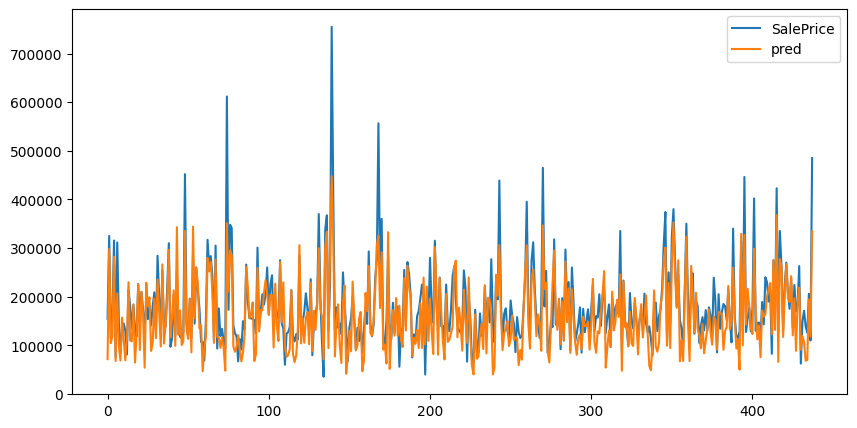

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2421105664.0000 - root_mean_squared_error: 49112.3438
[2370880512.0, 48691.6875]


In [123]:
plt.figure(figsize=(10,5))
plt.plot(final_result['SalePrice'], label='SalePrice')
plt.plot(final_result['pred'], label='pred')
plt.legend()
plt.show()
print(corr_select_model.evaluate(rs2_X2_valid, y2_valid))